In [73]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [75]:
AAPL=web.DataReader('AAPL','yahoo',start,end)
CSCO=web.DataReader('CSCO','yahoo',start,end)
IBM=web.DataReader('IBM','yahoo',start,end)
AMZN=web.DataReader('AMZN','yahoo',start,end)

In [78]:
aapl=AAPL['Close']
cisco=CSCO['Close']
ibm=IBM['Close']
amzn=AMZN['Close']

stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [79]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,58.747143,18.629999,186.300003,179.029999
2012-01-04,59.062859,18.990000,185.539993,177.509995
2012-01-05,59.718571,18.920000,184.660004,177.610001
2012-01-06,60.342857,18.850000,182.539993,182.610001
2012-01-09,60.247143,18.969999,181.589996,178.559998


In [80]:
stocks.tail()

,aapl,cisco,ibm,amzn
Date,,,,
2016-12-23,116.519997,30.530001,166.710007,760.590027
2016-12-27,117.260002,30.680000,167.139999,771.400024
2016-12-28,116.760002,30.420000,166.190002,772.130005
2016-12-29,116.730003,30.459999,166.600006,765.150024
2016-12-30,115.820000,30.219999,165.990005,749.869995


In [81]:
mean_daily_ret = stocks.pct_change(1).mean() # Mean Daily returns 
mean_daily_ret

aapl     0.000676
cisco    0.000487
ibm     -0.000022
amzn     0.001328
dtype: float64

In [85]:
stock_daily_ret = stocks.pct_change(1) #Daily returns
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [83]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.299310,0.297218,0.235714
cisco,0.299310,1.000000,0.422282,0.284503
ibm,0.297218,0.422282,1.000000,0.259811
amzn,0.235714,0.284503,0.259811,1.000000


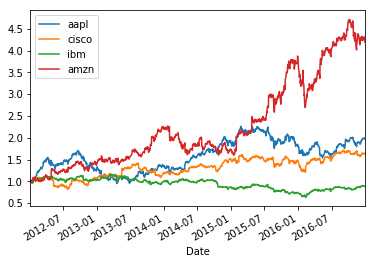

In [84]:
stock_normed = stocks/stocks.iloc[0] # cumulative returns
stock_normed.plot()

Using log returns from here onwards as using log returns is a good way of normalizing a time series data 

In [11]:
log_ret = np.log(stocks/stocks.shift(1)) # Logrithmic returns
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


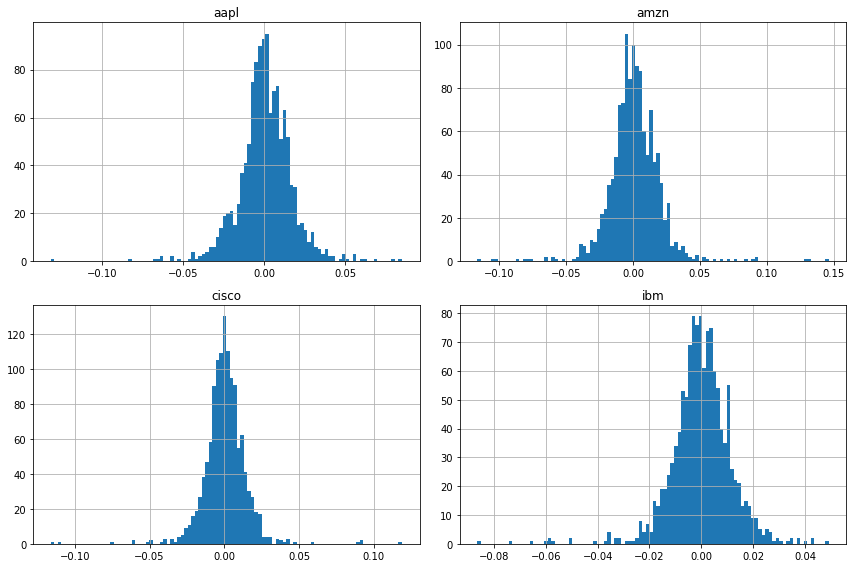

In [13]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [14]:
log_ret.mean() # Mean Daily log return

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [15]:
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


Allocating random weights to each stock in our portfolio and calculating the Sharpe Ratio.
Sharpe ratio is a good indicator of risk vs return in a stock investment

In [19]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random Weights')
print(weights)

print('Rebalance')
weights = weights/weights.sum()
print(weights)

# Expected returns

print('Expected portfolio return')
exp_ret = np.sum( (log_ret.mean()* weights)*252)
print('exp_ret')

# Expected Volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print('exp_vol')

print('Sharpe ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected portfolio return
exp_ret
Expected Volatility
exp_vol
Sharpe ratio
0.8430831483926032


Here we can just simulate the same process 5000 times 

In [26]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    
    weights = np.array(np.random.random(4))
    weights = weights/weights.sum()

    all_weights[i,:] = weights
    
    ret_arr[i] = np.sum((log_ret.mean()* weights)*252)

    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    sharpe_arr[i] = ret_arr[i]/vol_arr[i]
    

In [28]:
np.sum(log_ret.mean()*252*weights)

0.17851880289984323

In [29]:
sharpe_arr.max()

1.0303260551271067

In [30]:
sharpe_arr.argmax()

1420

In [31]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [35]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

Plotting the data

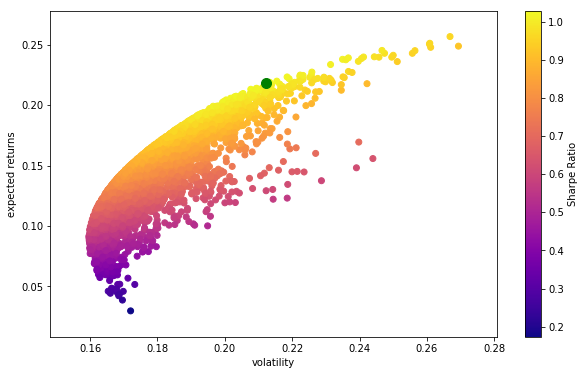

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('expected returns')

plt.scatter(max_sr_vol,max_sr_ret,color='green',s=100)

The green dot in our above plot indicates the optimal Sharpe ratio. 

Mathematical optimization

rather than running our data over multiple scenarios we can use mathematical optimization to achieve the optimum sharpe ratio

In [86]:
def get_ret_vol_sr(weights):
   # get returns, volatility, sharpe ratio for a given set of weights
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)*252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [87]:
from scipy.optimize import minimize

In [88]:
# Mininmizing negative sharpe same as maximizing positive sharpe

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1


In [89]:
# constraints

def check_sum(weights):
    return np.sum(weights) -1

# if sum of weights is 1 will return 0 esle the difference

In [90]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [91]:
# bounds of weights should be between 0 & 1

bounds = ((0,1),(0,1),(0,1),(0,1))

In [92]:
# Initial Guess (equal distribution) for the minimization function
init_guess = [0.25,0.25,0.25,0.25]

In [95]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,all_weights[1420,:],method='SLSQP',bounds=bounds,constraints=cons)

In [96]:
opt_results


     fun: -1.0307164751442526
     jac: array([ 0.00066401,  0.00055322,  0.34024677, -0.00054863])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([2.66555399e-01, 2.04561614e-01, 1.11239143e-16, 5.28882986e-01])

In [97]:
opt_results.x #gives an array of weights for optimal Sharpe-Ratio

array([2.66555399e-01, 2.04561614e-01, 1.11239143e-16, 5.28882986e-01])

In [98]:
get_ret_vol_sr(opt_results.x)

array([0.21876382, 0.21224442, 1.03071648])